In [4]:
#importing necessary libararies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [6]:
# Hyper-parameters
num_epochs = 10
batch_size = 10
learning_rate = 0.001


In [7]:
# Data preprocessing
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [8]:
# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [9]:
# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)


In [10]:
# Class labels for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [11]:
# Function to visualize images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


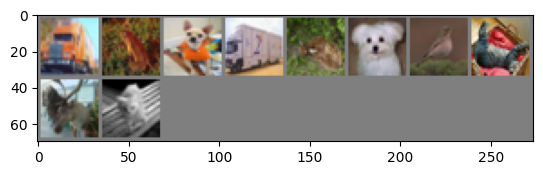

In [12]:
# Visualize some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


In [13]:
# Convolutional Neural Network (CNN) model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [14]:
# Instantiate the model
model = ConvNet().to(device)


In [15]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [16]:
# Training the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [2000/5000], Loss: 2.3150
Epoch [1/10], Step [4000/5000], Loss: 2.2949
Epoch [2/10], Step [2000/5000], Loss: 2.2928
Epoch [2/10], Step [4000/5000], Loss: 2.2740
Epoch [3/10], Step [2000/5000], Loss: 2.1552
Epoch [3/10], Step [4000/5000], Loss: 2.0700
Epoch [4/10], Step [2000/5000], Loss: 1.7169
Epoch [4/10], Step [4000/5000], Loss: 1.8800
Epoch [5/10], Step [2000/5000], Loss: 2.0151
Epoch [5/10], Step [4000/5000], Loss: 1.7968
Epoch [6/10], Step [2000/5000], Loss: 1.7957
Epoch [6/10], Step [4000/5000], Loss: 1.7974
Epoch [7/10], Step [2000/5000], Loss: 1.3612
Epoch [7/10], Step [4000/5000], Loss: 1.3134
Epoch [8/10], Step [2000/5000], Loss: 1.4949
Epoch [8/10], Step [4000/5000], Loss: 1.7596
Epoch [9/10], Step [2000/5000], Loss: 1.1107
Epoch [9/10], Step [4000/5000], Loss: 1.4475
Epoch [10/10], Step [2000/5000], Loss: 1.3504
Epoch [10/10], Step [4000/5000], Loss: 1.5650


In [17]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


Finished Training


In [18]:
# Evaluation on the test set
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 46.82 %
Accuracy of plane: 49.4 %
Accuracy of car: 53.1 %
Accuracy of bird: 26.4 %
Accuracy of cat: 40.0 %
Accuracy of deer: 32.2 %
Accuracy of dog: 42.5 %
Accuracy of frog: 63.6 %
Accuracy of horse: 50.6 %
Accuracy of ship: 50.8 %
Accuracy of truck: 59.6 %
